Finance Data Reader 라이브러리 설치

In [ ]:
#Finance data reader 라이브러리 설치
!pip install finance-datareader

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 89.3/89.3 kB 3.5 MB/s eta 0:00:00


LinearRegression 2020.01.01~2023.12.31의 데이터를 이용하여 2024년 주가 예측 및 시각화

Mean Squared Error: 5233.59
          Date  Predicted Close
0   2024-01-01       286.284663
1   2024-01-02       286.391047
2   2024-01-03       286.497432
3   2024-01-04       286.603816
4   2024-01-05       286.710200
..         ...              ...
301 2024-10-28       318.306292
302 2024-10-29       318.412676
303 2024-10-30       318.519061
304 2024-10-31       318.625445
305 2024-11-01       318.731829

[306 rows x 2 columns]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


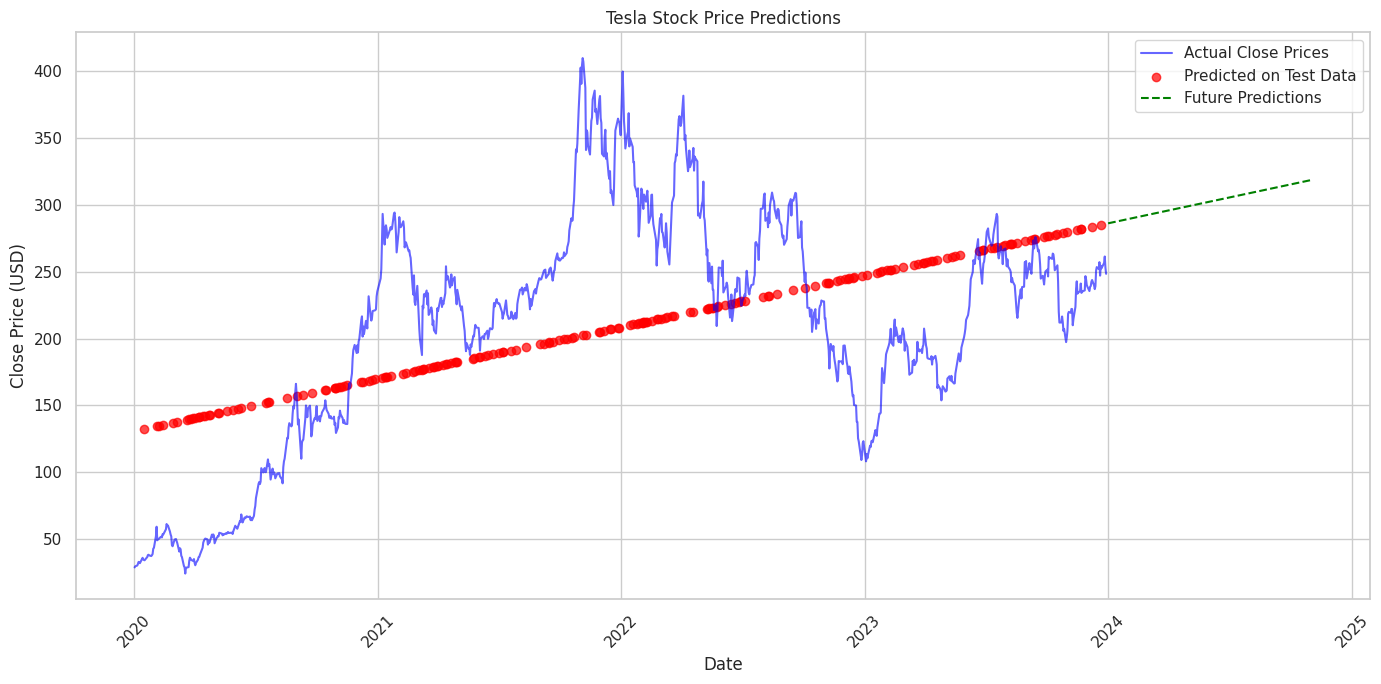

In [ ]:
import FinanceDataReader as fdr
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import numpy as np

# 테슬라 주식 데이터 수집 (2020년 1월 1일부터 2023년 12월 31일까지)
start_date = '2020-01-01'
end_date = '2023-12-31'
ticker = 'TSLA'

tesla_data = fdr.DataReader(ticker, start_date, end_date)

# 특징 및 타겟 변수 설정 (날짜 -> 타임스탬프 값 사용)
tesla_data['Date'] = tesla_data.index
tesla_data['Date'] = tesla_data['Date'].map(pd.Timestamp.toordinal)

# 입력 X는 Date 컬럼, 출력 y는 Close (종가)
X = tesla_data[['Date']]
y = tesla_data['Close']

# 학습 및 테스트 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 선형 회귀 모델 생성 및 학습
model = LinearRegression()
model.fit(X_train, y_train)

# 테스트 데이터로 예측
y_pred = model.predict(X_test)

# 성능 평가
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse:.2f}')

# 2024년 1월 1일부터 2024년 11월 1일까지의 날짜 생성
future_dates = pd.date_range(start='2024-01-01', end='2024-11-01')
future_dates_ordinal = future_dates.map(pd.Timestamp.toordinal).values.reshape(-1, 1)

# 미래 날짜에 대한 예측
future_predictions = model.predict(future_dates_ordinal)

# 결과 출력
future_df = pd.DataFrame({
    'Date': future_dates,
    'Predicted Close': future_predictions
})
print(future_df)

import matplotlib.pyplot as plt
import seaborn as sns

# 기존 스타일 설정
sns.set(style='whitegrid')

# 학습 데이터와 테스트 데이터 시각화
plt.figure(figsize=(14, 7))
plt.plot(tesla_data.index, tesla_data['Close'], label='Actual Close Prices', color='blue', alpha=0.6)
plt.scatter(X_test.index, y_pred, label='Predicted on Test Data', color='red', marker='o', alpha=0.7)

# 미래 예측 시각화
plt.plot(future_df['Date'], future_df['Predicted Close'], label='Future Predictions', color='green', linestyle='--')

# 그래프 꾸미기
plt.title('Tesla Stock Price Predictions')
plt.xlabel('Date')
plt.ylabel('Close Price (USD)')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()

# 그래프 표시
plt.show()


XGBoost 2020.01.01~2023.12.31의 데이터를 이용하여 2024년 주가 예측 및 시각화

Mean Squared Error: 0.00
          Date  Predicted Close
0   2024-01-01       250.933884
1   2024-01-02       252.110672
2   2024-01-03       251.404343
3   2024-01-04       250.076645
4   2024-01-05       251.013290
..         ...              ...
301 2024-10-28       254.936523
302 2024-10-29       254.936523
303 2024-10-30       254.936523
304 2024-10-31       254.612854
305 2024-11-01       254.612854

[306 rows x 2 columns]


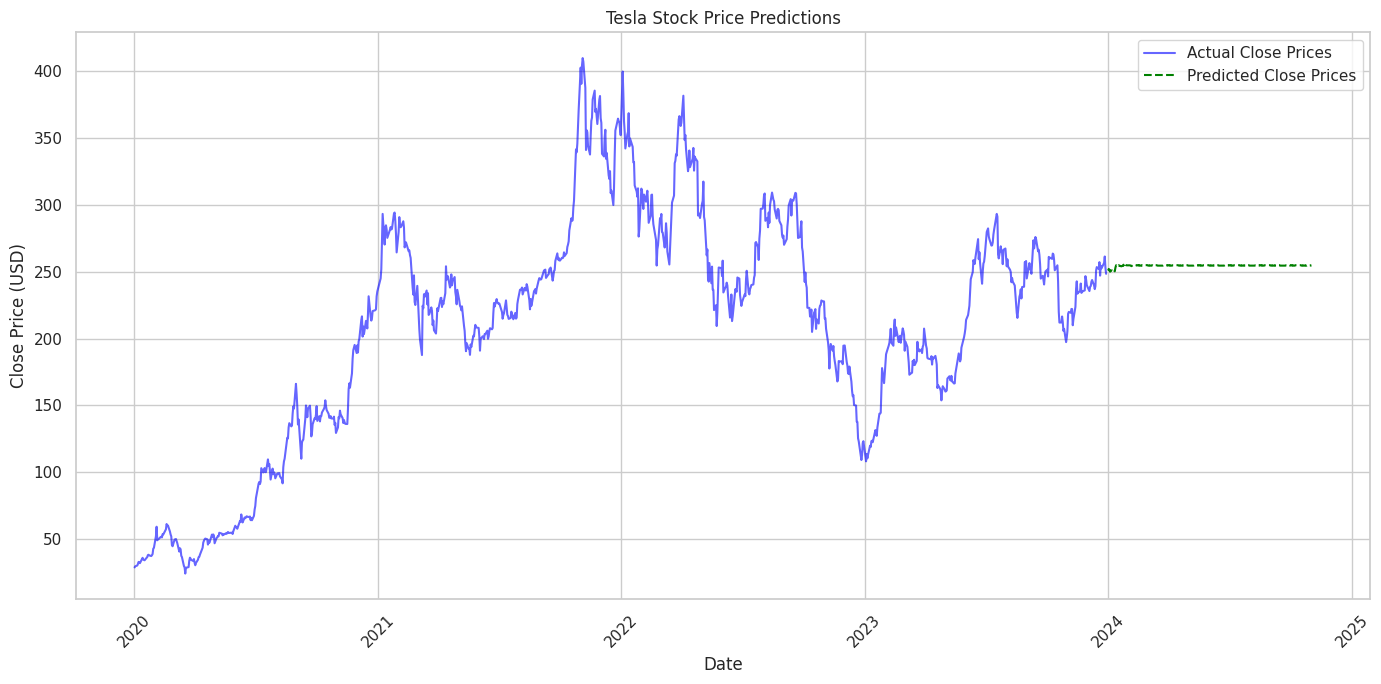

In [ ]:
import FinanceDataReader as fdr
import pandas as pd
import numpy as np
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import MinMaxScaler

# 데이터 수집 (2014년 1월 1일부터 2024년 1월 1일까지)
start_date = '2020-01-01'
end_date = '2023-12-31'
ticker = 'TSLA'
tesla_data = fdr.DataReader(ticker, start_date, end_date)

# 종가 데이터와 날짜 설정
tesla_data['Date'] = tesla_data.index
tesla_data = tesla_data[['Date', 'Close']]

# 데이터 정규화
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_close = scaler.fit_transform(tesla_data['Close'].values.reshape(-1, 1))

# 시계열 데이터셋 생성 (과거 60일을 이용하여 다음날 예측)
sequence_length = 60
X = []
y = []

for i in range(sequence_length, len(scaled_close)):
    X.append(scaled_close[i-sequence_length:i, 0])
    y.append(scaled_close[i, 0])

X = np.array(X)
y = np.array(y)

# 학습 및 테스트 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# XGBoost는 2차원 데이터가 필요하므로 차원 조정
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1])
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1])

# XGBoost 모델 생성 및 학습
model = XGBRegressor(n_estimators=100, learning_rate=0.05, max_depth=5)
model.fit(X_train, y_train)

# 테스트 데이터 예측
y_pred = model.predict(X_test)

# 성능 평가
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse:.2f}')

# 미래 데이터 예측 (2024년 1월 1일부터 2024년 11월 1일까지)
future_start_date = '2024-01-01'
future_end_date = '2024-11-01'
future_dates = pd.date_range(start=future_start_date, end=future_end_date)

# 예측을 위한 마지막 60일 데이터 준비
last_60_days = scaled_close[-sequence_length:].reshape(1, -1)

# 미래 예측 루프
predictions = []
for _ in range(len(future_dates)):
    predicted_price = model.predict(last_60_days)
    predictions.append(predicted_price[0])

    # 새로운 입력 데이터에 예측 결과 추가
    last_60_days = np.append(last_60_days[:, 1:], predicted_price).reshape(1, -1)

# 예측 값 스케일링 원복
predicted_prices = scaler.inverse_transform(np.array(predictions).reshape(-1, 1))

# 결과 출력
future_df = pd.DataFrame({
    'Date': future_dates,
    'Predicted Close': predicted_prices.flatten()
})
print(future_df)


import matplotlib.pyplot as plt
import seaborn as sns

# 스타일 설정
sns.set(style='whitegrid')

# 시각화할 그림의 크기 설정
plt.figure(figsize=(14, 7))

# 과거 실제 종가 시각화
# tesla_data의 인덱스와 'Close' 열을 사용하여 실제 종가를 시각화
plt.plot(tesla_data.index, tesla_data['Close'], label='Actual Close Prices', color='blue', alpha=0.6)

# 미래 예측 종가 시각화
# future_df의 'Date' 열과 'Predicted Close' 열을 사용하여 예측 종가를 시각화
plt.plot(future_df['Date'], future_df['Predicted Close'], label='Predicted Close Prices', color='green', linestyle='--')

# 그래프 꾸미기
plt.title('Tesla Stock Price Predictions')  # 그래프 제목
plt.xlabel('Date')  # X축 레이블
plt.ylabel('Close Price (USD)')  # Y축 레이블
plt.legend()  # 범례 표시
plt.xticks(rotation=45)  # X축 레이블 회전
plt.tight_layout()  # 레이아웃 조정

# 그래프 표시
plt.show()

XGBoost를 이용한 2024년 1월 1일 ~ 2024년 11월 1일 예측값과 실제값 차이와 정확도

Mean Squared Error: 0.00
          Date  Predicted Close
0   2024-01-01       250.933884
1   2024-01-02       252.110672
2   2024-01-03       251.404343
3   2024-01-04       250.076645
4   2024-01-05       251.013290
..         ...              ...
301 2024-10-28       254.936523
302 2024-10-29       254.936523
303 2024-10-30       254.936523
304 2024-10-31       254.612854
305 2024-11-01       254.612854

[306 rows x 2 columns]
R² Score: -2.87
Root Mean Squared Error (RMSE): 58.99


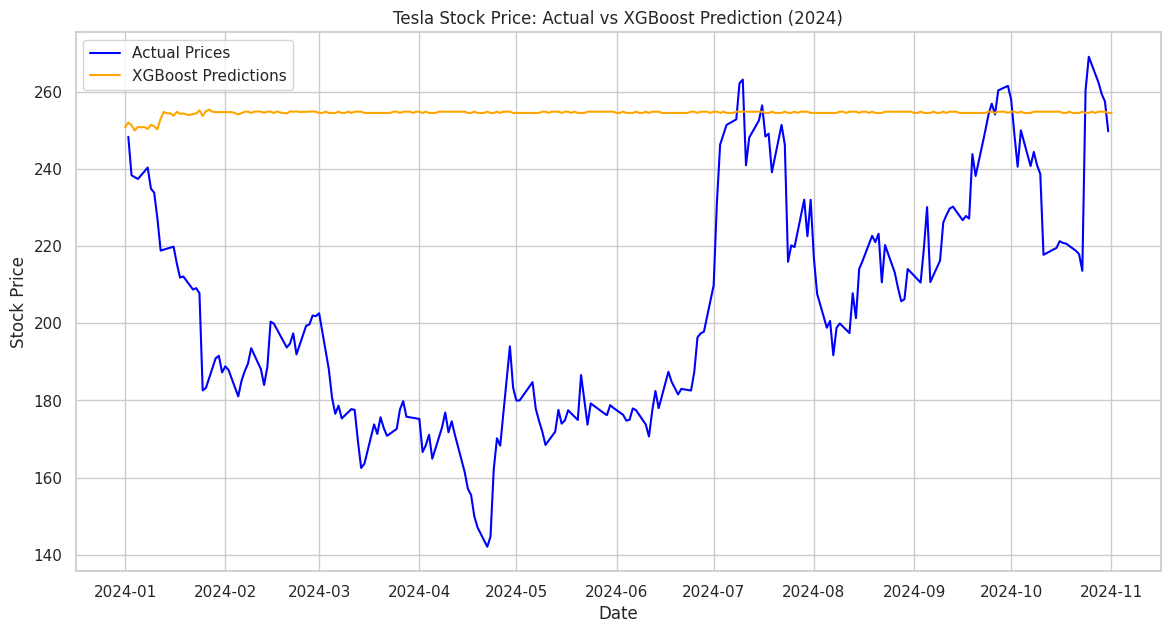

In [ ]:
import FinanceDataReader as fdr
import pandas as pd
import numpy as np
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, r2_score

# 데이터 수집 (2014년 1월 1일부터 2024년 1월 1일까지)
start_date = '2020-01-01'
end_date = '2023-12-31'
ticker = 'TSLA'
tesla_data = fdr.DataReader(ticker, start_date, end_date)

# 종가 데이터와 날짜 설정
tesla_data['Date'] = tesla_data.index
tesla_data = tesla_data[['Date', 'Close']]

# 데이터 정규화
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_close = scaler.fit_transform(tesla_data['Close'].values.reshape(-1, 1))

# 시계열 데이터셋 생성 (과거 60일을 이용하여 다음날 예측)
sequence_length = 60
X = []
y = []

for i in range(sequence_length, len(scaled_close)):
    X.append(scaled_close[i-sequence_length:i, 0])
    y.append(scaled_close[i, 0])

X = np.array(X)
y = np.array(y)

# 학습 및 테스트 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# XGBoost는 2차원 데이터가 필요하므로 차원 조정
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1])
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1])

# XGBoost 모델 생성 및 학습
model = XGBRegressor(n_estimators=100, learning_rate=0.05, max_depth=5)
model.fit(X_train, y_train)

# 테스트 데이터 예측
y_pred = model.predict(X_test)

# 성능 평가
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse:.2f}')

# 미래 데이터 예측 (2024년 1월 1일부터 2024년 11월 1일까지)
future_start_date = '2024-01-01'
future_end_date = '2024-11-01'
future_dates = pd.date_range(start=future_start_date, end=future_end_date)

# 예측을 위한 마지막 60일 데이터 준비
last_60_days = scaled_close[-sequence_length:].reshape(1, -1)

# 미래 예측 루프
predictions = []
for _ in range(len(future_dates)):
    predicted_price = model.predict(last_60_days)
    predictions.append(predicted_price[0])

    # 새로운 입력 데이터에 예측 결과 추가
    last_60_days = np.append(last_60_days[:, 1:], predicted_price).reshape(1, -1)

# 예측 값 스케일링 원복
predicted_prices = scaler.inverse_transform(np.array(predictions).reshape(-1, 1))

# 결과 출력
future_df = pd.DataFrame({
    'Date': future_dates,
    'Predicted Close': predicted_prices.flatten()
})
print(future_df)

# 실제 2024년 데이터 수집 (2024년 1월 1일부터 2024년 11월 1일까지)
actual_data = fdr.DataReader(ticker, future_start_date, future_end_date)

# 미래 예측과 실제 데이터 비교
actual_prices = actual_data['Close'].values
actual_dates = actual_data.index

# 길이 맞추기 (예측과 실제 데이터가 다를 수 있음)
min_length = min(len(actual_prices), len(predicted_prices))
actual_prices = actual_prices[:min_length]
predicted_prices = predicted_prices[:min_length]
actual_dates = actual_dates[:min_length]

# R² 스코어 및 RMSE 계산
r2 = r2_score(actual_prices, predicted_prices)
rmse = np.sqrt(mean_squared_error(actual_prices, predicted_prices))

# 결과 출력
print(f'R² Score: {r2:.2f}')
print(f'Root Mean Squared Error (RMSE): {rmse:.2f}')

# 결과 비교 데이터프레임 생성
comparison_df = pd.DataFrame({
    'Date': actual_dates,
    'Actual Price': actual_prices,
    'Predicted Price': predicted_prices.flatten()
})


# 시각화
plt.figure(figsize=(14, 7))
plt.plot(actual_data.index, actual_data['Close'], label='Actual Prices', color='blue')
plt.plot(future_df['Date'], future_df['Predicted Close'], label='XGBoost Predictions', color='orange')

# 그래프 레이블링 및 설정
plt.title('Tesla Stock Price: Actual vs XGBoost Prediction (2024)')
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.legend()
plt.grid(True)
plt.show()



Linear Regression을 이용한 2024년 1월 1일 ~ 2024년 11월 1일 예측값과 실제값 차이와 정확도

Mean Squared Error (MSE): 10283.45
Mean Absolute Error (MAE): 97.95
R-squared (R²): -10.45


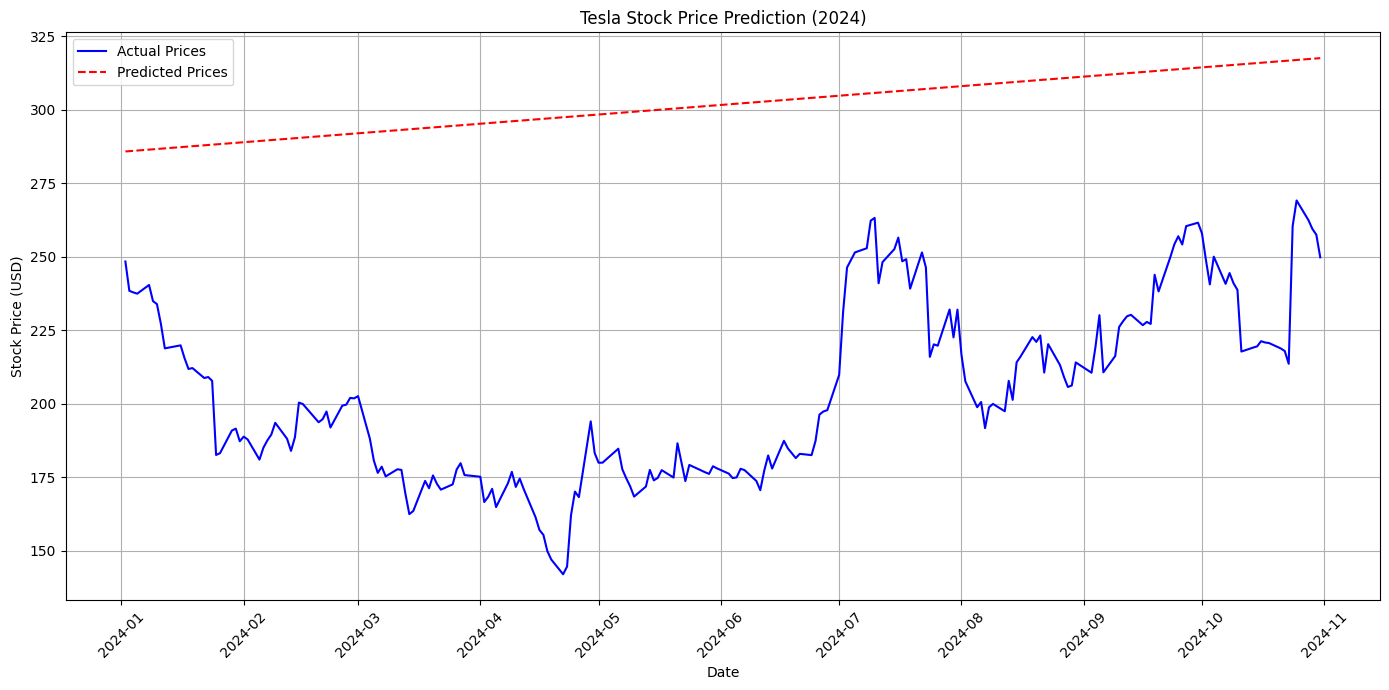

In [ ]:
import FinanceDataReader as fdr
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import matplotlib.pyplot as plt

# 데이터 수집 (2020년 1월 1일부터 2024년 11월 1일까지)
train_start_date = '2020-01-01'
train_end_date = '2023-12-31'
test_start_date = '2024-01-01'
test_end_date = '2024-11-01'
ticker = 'TSLA'

# 학습 데이터
train_data = fdr.DataReader(ticker, train_start_date, train_end_date)
train_data['Date'] = train_data.index
train_data['Date_ordinal'] = pd.to_datetime(train_data['Date']).map(pd.Timestamp.toordinal)

# 테스트 데이터
test_data = fdr.DataReader(ticker, test_start_date, test_end_date)
test_data['Date'] = test_data.index
test_data['Date_ordinal'] = pd.to_datetime(test_data['Date']).map(pd.Timestamp.toordinal)

# 데이터 준비
# 학습 데이터: X는 날짜(ordinal), y는 종가
X_train = train_data['Date_ordinal'].values.reshape(-1, 1)
y_train = train_data['Close'].values.reshape(-1, 1)

# 테스트 데이터: X는 날짜(ordinal), y는 종가
X_test = test_data['Date_ordinal'].values.reshape(-1, 1)
y_test = test_data['Close'].values.reshape(-1, 1)

# 데이터 정규화
scaler = MinMaxScaler()
y_train_scaled = scaler.fit_transform(y_train)

# Linear Regression 모델 생성 및 학습
model = LinearRegression()
model.fit(X_train, y_train_scaled)

# 테스트 데이터 예측
y_test_pred_scaled = model.predict(X_test)
y_test_pred = scaler.inverse_transform(y_test_pred_scaled)

# 성능 평가
mse = mean_squared_error(y_test, y_test_pred)
mae = mean_absolute_error(y_test, y_test_pred)
r2 = r2_score(y_test, y_test_pred)

print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"R-squared (R²): {r2:.2f}")

# 시각화
plt.figure(figsize=(14, 7))

# 실제 값 (테스트 데이터)
plt.plot(test_data['Date'], y_test, label='Actual Prices', color='blue')

# 예측 값 (테스트 데이터)
plt.plot(test_data['Date'], y_test_pred, label='Predicted Prices', color='red', linestyle='--')

# 그래프 레이블링 및 설정
plt.title('Tesla Stock Price Prediction (2024)')
plt.xlabel('Date')
plt.ylabel('Stock Price (USD)')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()

# 그래프 표시
plt.show()


LSTM을 이용하여 2020.01.01~2023.12.31의 데이터를 이용하여 2024년 주가 예측 및 시각화

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 6s 52ms/step - loss: 0.1206
Epoch 2/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 46ms/step - loss: 0.0079
Epoch 3/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 59ms/step - loss: 0.0059
Epoch 4/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 3s 70ms/step - loss: 0.0052
Epoch 5/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 47ms/step - loss: 0.0052
Epoch 6/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 3s 47ms/step - loss: 0.0053
Epoch 7/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 3s 48ms/step - loss: 0.0050
Epoch 8/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 3s 46ms/step - loss: 0.0049
Epoch 9/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 78ms/step - loss: 0.0050
Epoch 10/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 59ms/step - loss: 0.0041
Epoch 11/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 47ms/step - loss: 0.0043
Epoch 12/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 3s 48ms/step - loss: 0.0042
Epoch 13/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 48ms/step - loss: 0.0041
Epoch 14/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 48ms/step - loss: 0.0038
Epoch 15/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 49ms/step - loss: 0.0046
Epoc

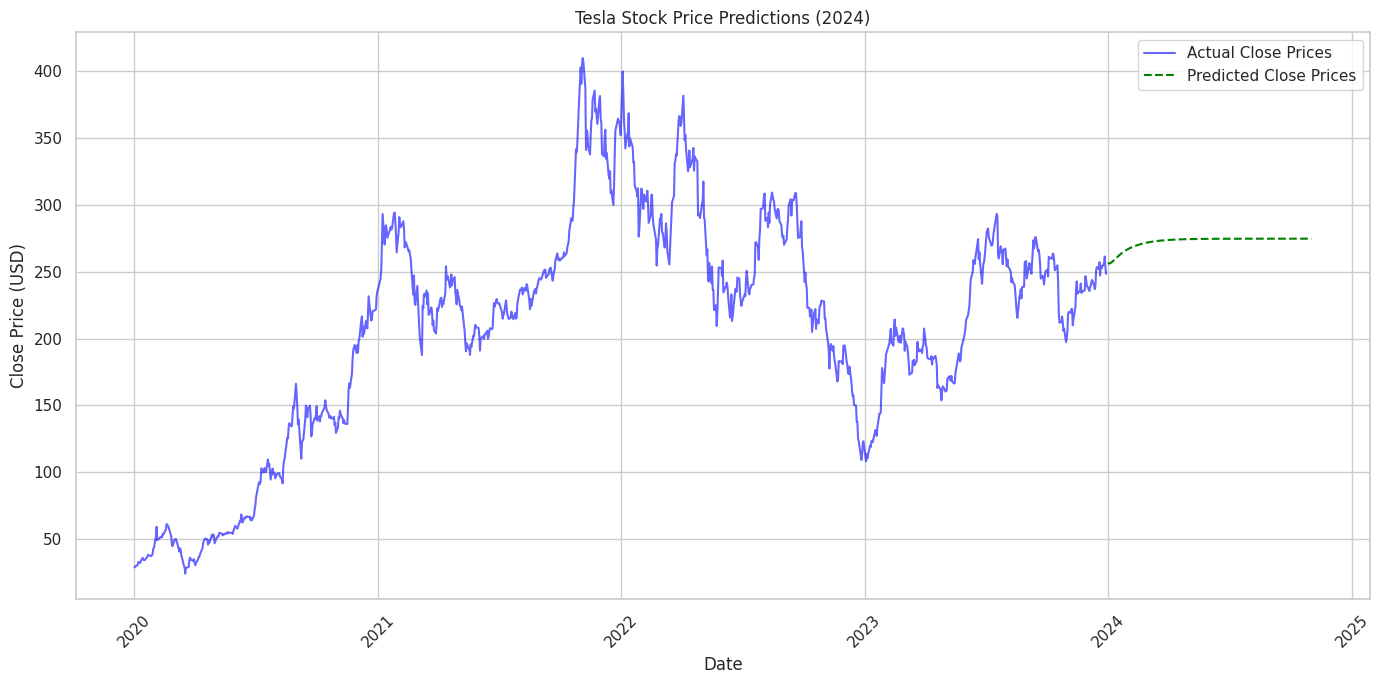

In [ ]:
import FinanceDataReader as fdr
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
import matplotlib.pyplot as plt
import seaborn as sns

# 데이터 수집 (2020년 1월 1일부터 2023년 12월 31일까지)
start_date = '2020-01-01'
end_date = '2023-12-31'
ticker = 'TSLA'
tesla_data = fdr.DataReader(ticker, start_date, end_date)

# 종가 데이터를 이용
closing_prices = tesla_data['Close'].values.reshape(-1, 1)

# 데이터 정규화 (0-1 사이로 변환)
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(closing_prices)

# 데이터셋 생성 (X는 과거 60일, y는 다음날 종가)
sequence_length = 60
X = []
y = []

for i in range(sequence_length, len(scaled_data)):
    X.append(scaled_data[i-sequence_length:i, 0])
    y.append(scaled_data[i, 0])

X = np.array(X)
y = np.array(y)

# LSTM 입력 형태 맞춤 (샘플 수, 타임스텝, 특징 수)
X = X.reshape(X.shape[0], X.shape[1], 1)

# LSTM 모델 생성
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(X.shape[1], 1)))
model.add(Dropout(0.2))
model.add(LSTM(units=50, return_sequences=False))
model.add(Dropout(0.2))
model.add(Dense(units=1))

# 모델 컴파일
model.compile(optimizer='adam', loss='mean_squared_error')

# 모델 학습
model.fit(X, y, batch_size=32, epochs=50)

# 미래 데이터 예측을 위해 입력 데이터 준비
future_start_date = '2024-01-01'
future_end_date = '2024-11-01'
future_dates = pd.date_range(start=future_start_date, end=future_end_date)

# 최근 60일 데이터로 미래 예측 시작
last_60_days = scaled_data[-sequence_length:]
input_data = last_60_days.reshape(1, sequence_length, 1)

# 예측 결과를 저장할 리스트 초기화
predictions = []

# 미래 데이터 예측 루프
for _ in range(len(future_dates)):
    predicted_price = model.predict(input_data)
    predictions.append(predicted_price[0, 0])

    # 새로운 입력 데이터에 예측 결과 추가 (차원 맞추기)
    predicted_price_reshaped = predicted_price.reshape((1, 1, 1))
    input_data = np.append(input_data[:, 1:, :], predicted_price_reshaped, axis=1)

# 예측 값 스케일링 원복
predicted_prices = scaler.inverse_transform(np.array(predictions).reshape(-1, 1))

# 결과 출력
future_df = pd.DataFrame({
    'Date': future_dates,
    'Predicted Close': predicted_prices.flatten()
})
print(future_df)

# 스타일 설정
sns.set(style='whitegrid')

# 시각화
plt.figure(figsize=(14, 7))

# 과거 실제 종가 시각화
plt.plot(tesla_data.index, tesla_data['Close'], label='Actual Close Prices', color='blue', alpha=0.6)

# 미래 예측 종가 시각화
plt.plot(future_df['Date'], future_df['Predicted Close'], label='Predicted Close Prices', color='green', linestyle='--')

# 그래프 꾸미기
plt.title('Tesla Stock Price Predictions (2024)')
plt.xlabel('Date')
plt.ylabel('Close Price (USD)')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()

# 그래프 표시
plt.show()


LSTM을 이용한 2024년 1월 1일 ~ 2024년 11월 1일 예측값과 실제값 차이와 정확도

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 9s 49ms/step - loss: 0.1253
Epoch 2/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 80ms/step - loss: 0.0085
Epoch 3/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 57ms/step - loss: 0.0066
Epoch 4/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 49ms/step - loss: 0.0064
Epoch 5/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 3s 49ms/step - loss: 0.0053
Epoch 6/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 3s 49ms/step - loss: 0.0052
Epoch 7/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 49ms/step - loss: 0.0046
Epoch 8/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 3s 73ms/step - loss: 0.0044
Epoch 9/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 51ms/step - loss: 0.0046
Epoch 10/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 49ms/step - loss: 0.0044
Epoch 11/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 3s 50ms/step - loss: 0.0041
Epoch 12/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 49ms/step - loss: 0.0036
Epoch 13/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 76ms/step - loss: 0.0045
Epoch 14/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 75ms/step - loss: 0.0044
Epoch 15/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 49ms/step - loss: 0.0037
Epoc

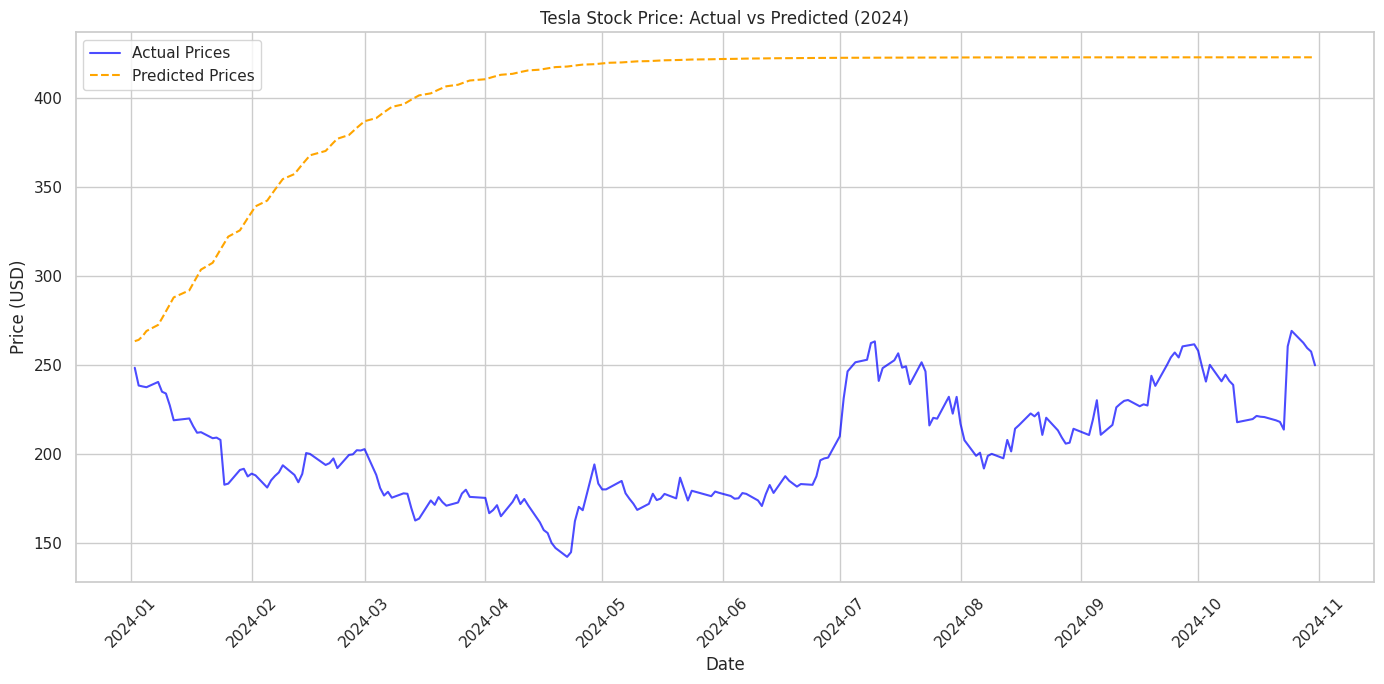

In [ ]:
import FinanceDataReader as fdr
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
import matplotlib.pyplot as plt
import seaborn as sns

# 데이터 수집 (2020년 1월 1일부터 2023년 12월 31일까지)
start_date = '2020-01-01'
end_date = '2023-12-31'
ticker = 'TSLA'
tesla_data = fdr.DataReader(ticker, start_date, end_date)

# 종가 데이터를 이용
closing_prices = tesla_data['Close'].values.reshape(-1, 1)

# 데이터 정규화 (0-1 사이로 변환)
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(closing_prices)

# 데이터셋 생성 (X는 과거 60일, y는 다음날 종가)
sequence_length = 60
X = []
y = []

for i in range(sequence_length, len(scaled_data)):
    X.append(scaled_data[i-sequence_length:i, 0])
    y.append(scaled_data[i, 0])

X = np.array(X)
y = np.array(y)

# LSTM 입력 형태 맞춤 (샘플 수, 타임스텝, 특징 수)
X = X.reshape(X.shape[0], X.shape[1], 1)

# LSTM 모델 생성
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(X.shape[1], 1)))
model.add(Dropout(0.2))
model.add(LSTM(units=50, return_sequences=False))
model.add(Dropout(0.2))
model.add(Dense(units=1))

# 모델 컴파일
model.compile(optimizer='adam', loss='mean_squared_error')

# 모델 학습
model.fit(X, y, batch_size=32, epochs=50)

# 미래 데이터 예측을 위해 입력 데이터 준비
future_start_date = '2024-01-01'
future_end_date = '2024-11-01'
future_dates = pd.date_range(start=future_start_date, end=future_end_date)

# 최근 60일 데이터로 미래 예측 시작
last_60_days = scaled_data[-sequence_length:]
input_data = last_60_days.reshape(1, sequence_length, 1)

# 예측 결과를 저장할 리스트 초기화
predictions = []

# 미래 데이터 예측 루프
for _ in range(len(future_dates)):
    predicted_price = model.predict(input_data)
    predictions.append(predicted_price[0, 0])

    # 새로운 입력 데이터에 예측 결과 추가 (차원 맞추기)
    predicted_price_reshaped = predicted_price.reshape((1, 1, 1))
    input_data = np.append(input_data[:, 1:, :], predicted_price_reshaped, axis=1)

# 예측 값 스케일링 원복
predicted_prices = scaler.inverse_transform(np.array(predictions).reshape(-1, 1))

# 실제 데이터를 크롤링
actual_data = fdr.DataReader(ticker, '2024-01-01', '2024-11-01')

# 실제 데이터의 날짜와 종가
actual_prices = actual_data['Close'].values
actual_dates = actual_data.index

# 예측 데이터와 실제 데이터 길이 맞추기
min_length = min(len(actual_prices), len(predicted_prices))

# 데이터 자르기
actual_prices = actual_prices[:min_length]
predicted_prices = predicted_prices[:min_length]
actual_dates = actual_dates[:min_length]

# 결과 비교 데이터프레임 생성
comparison_df = pd.DataFrame({
    'Date': actual_dates,
    'Actual Price': actual_prices,
    'Predicted Price': predicted_prices.flatten()
})


# 정확도 계산
mae = mean_absolute_error(actual_prices, predicted_prices.flatten())
rmse = np.sqrt(mean_squared_error(actual_prices, predicted_prices.flatten()))

# 결과 출력
print(comparison_df)
print(f'Mean Absolute Error (MAE): {mae:.2f}')
print(f'Root Mean Squared Error (RMSE): {rmse:.2f}')

# 시각화
sns.set(style='whitegrid')
plt.figure(figsize=(14, 7))

# 실제 값과 예측 값 그래프
plt.plot(comparison_df['Date'], comparison_df['Actual Price'], label='Actual Prices', color='blue', alpha=0.7)
plt.plot(comparison_df['Date'], comparison_df['Predicted Price'], label='Predicted Prices', color='orange', linestyle='--')

# 그래프 꾸미기
plt.title('Tesla Stock Price: Actual vs Predicted (2024)')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.legend()
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()

# 그래프 표시
plt.show()


테슬라의 나스닥 순위

Tesla (TSLA) is ranked 7 by market cap among selected NASDAQ companies.


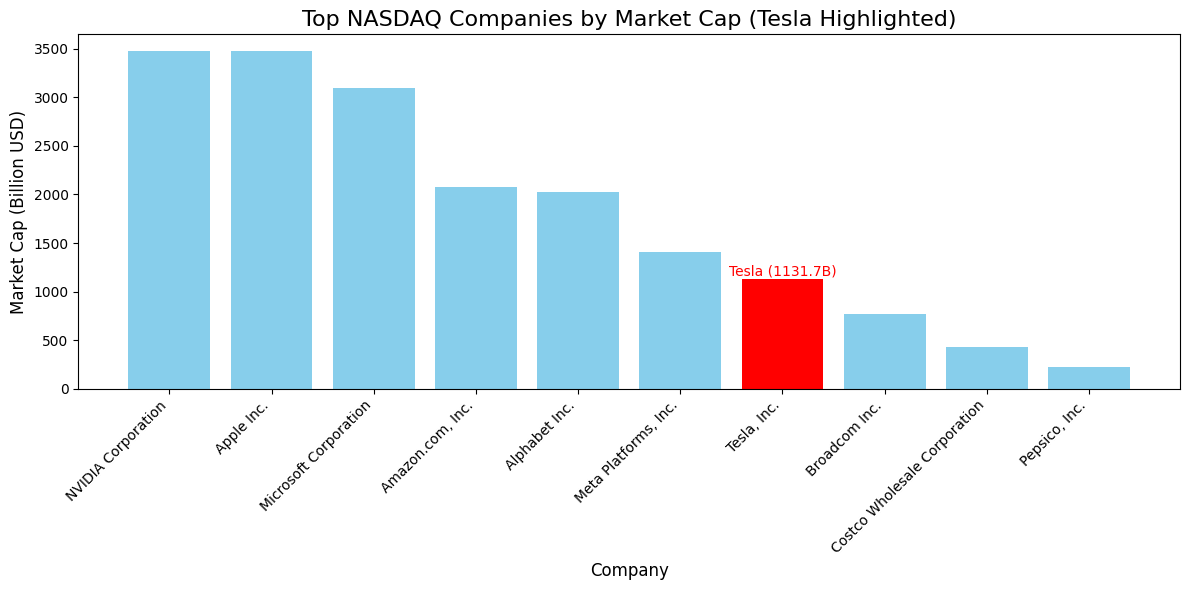

In [ ]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt

# 주요 NASDAQ 상위 기업 리스트
symbols = ['AAPL', 'MSFT', 'GOOGL', 'AMZN', 'NVDA', 'TSLA', 'META', 'AVGO', 'PEP', 'COST']

# 시가총액 가져오기
data = []
for symbol in symbols:
    stock = yf.Ticker(symbol)
    info = stock.info
    data.append({
        'Symbol': symbol,
        'Name': info.get('shortName', symbol),
        'MarketCap': info.get('marketCap', 0)
    })

# DataFrame 생성
df = pd.DataFrame(data)
df = df.sort_values('MarketCap', ascending=False).reset_index(drop=True)

# 테슬라 순위 확인
tesla_rank = df[df['Symbol'] == 'TSLA'].index[0] + 1
print(f"Tesla (TSLA) is ranked {tesla_rank} by market cap among selected NASDAQ companies.")

# 시각화
plt.figure(figsize=(12, 6))
colors = ['red' if symbol == 'TSLA' else 'skyblue' for symbol in df['Symbol']]
plt.bar(df['Name'], df['MarketCap'] / 1e9, color=colors)

# 그래프 꾸미기
plt.title('Top NASDAQ Companies by Market Cap (Tesla Highlighted)', fontsize=16)
plt.xlabel('Company', fontsize=12)
plt.ylabel('Market Cap (Billion USD)', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

# 테슬라 강조 레이블 추가
tesla_market_cap = df[df['Symbol'] == 'TSLA']['MarketCap'].values[0] / 1e9
plt.text(df[df['Symbol'] == 'TSLA'].index[0], tesla_market_cap, f'Tesla ({tesla_market_cap:.1f}B)',
         ha='center', va='bottom', color='red', fontsize=10)

plt.show()


Linear Regression을 이용한 테슬라 2025년 주가 예측

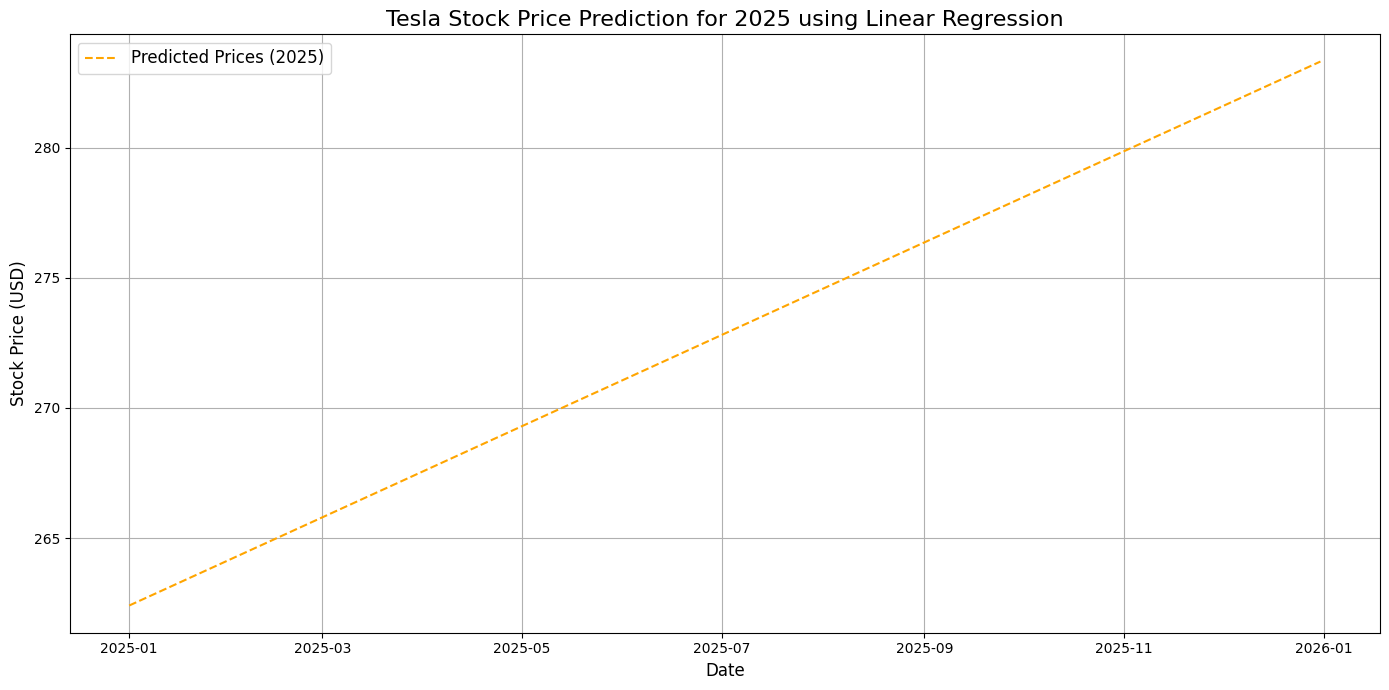

In [ ]:
import FinanceDataReader as fdr
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt

# 데이터 수집 (2020년 1월 1일부터 2024년 12월 31일까지)
start_date = '2020-01-01'
end_date = '2024-11-01'
ticker = 'TSLA'
tesla_data = fdr.DataReader(ticker, start_date, end_date)

# 데이터 준비
tesla_data['Date'] = tesla_data.index
tesla_data['Date_ordinal'] = pd.to_datetime(tesla_data['Date']).map(pd.Timestamp.toordinal)
dates = tesla_data['Date_ordinal'].values.reshape(-1, 1)
prices = tesla_data['Close'].values.reshape(-1, 1)

# 데이터 정규화
scaler = MinMaxScaler()
scaled_prices = scaler.fit_transform(prices)

# Linear Regression 모델 생성 및 학습
model = LinearRegression()
model.fit(dates, scaled_prices)

# 2025년 데이터 준비 (예측 범위: 2025년 1월 1일부터 2025년 12월 31일까지)
future_start_date = '2025-01-01'
future_end_date = '2025-12-31'
future_dates = pd.date_range(start=future_start_date, end=future_end_date)
future_dates_ordinal = np.array([pd.Timestamp(date).toordinal() for date in future_dates]).reshape(-1, 1)

# 2025년 예측
future_predictions_scaled = model.predict(future_dates_ordinal)
future_predictions = scaler.inverse_transform(future_predictions_scaled)

# 시각화
plt.figure(figsize=(14, 7))


# 2025년 예측 데이터
plt.plot(future_dates, future_predictions, label='Predicted Prices (2025)', color='orange', linestyle='--')

# 그래프 꾸미기
plt.title('Tesla Stock Price Prediction for 2025 using Linear Regression', fontsize=16)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Stock Price (USD)', fontsize=12)
plt.legend(fontsize=12)
plt.grid(True)
plt.tight_layout()

# 그래프 표시
plt.show()


In [ ]:
!pip install --upgrade yfinance

테슬라 S&P500 순위

Tesla (TSLA) is ranked 7 by market cap among selected S&P 500 companies.


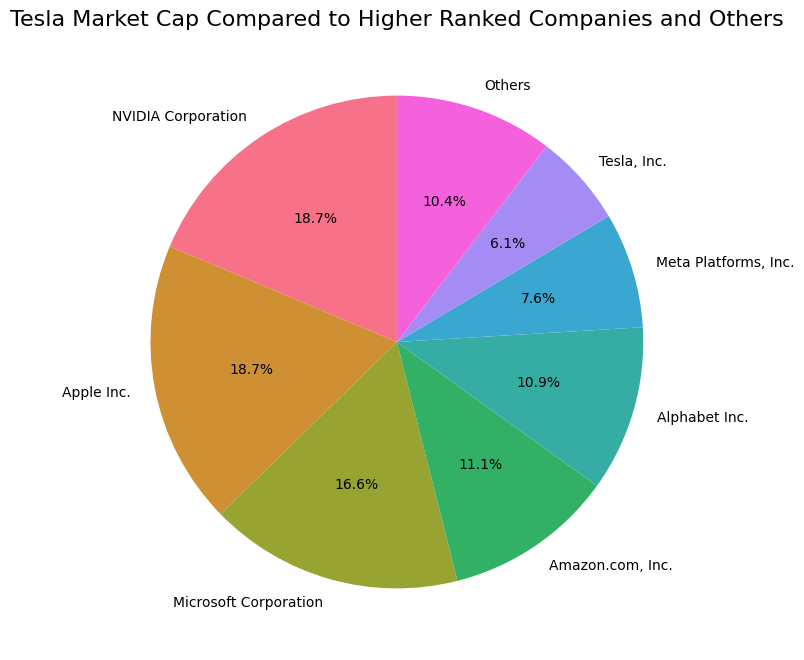

In [8]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 주요 S&P 500 상위 기업 리스트
symbols = ['AAPL', 'MSFT', 'AMZN', 'NVDA', 'TSLA', 'GOOGL', 'META', 'BRK-B', 'XOM', 'JNJ']

# 시가총액 가져오기
data = []
for symbol in symbols:
    stock = yf.Ticker(symbol)
    info = stock.info
    data.append({
        'Symbol': symbol,
        'Name': info.get('shortName', symbol),
        'MarketCap': info.get('marketCap', 0)
    })

# DataFrame 생성
df = pd.DataFrame(data)
df = df.sort_values('MarketCap', ascending=False).reset_index(drop=True)

# 테슬라 순위 계산
tesla_rank = df[df['Symbol'] == 'TSLA'].index[0] + 1
print(f"Tesla (TSLA) is ranked {tesla_rank} by market cap among selected S&P 500 companies.")

# 테슬라보다 높은 순위의 기업과 기타 기업 분리
higher_ranked = df[df.index < tesla_rank - 1]
tesla_row = df[df['Symbol'] == 'TSLA']
others_market_cap = df[df.index >= tesla_rank]['MarketCap'].sum()

# 데이터 준비
others_row = pd.DataFrame({'Name': ['Others'], 'MarketCap': [others_market_cap]})
pie_data = pd.concat([higher_ranked[['Name', 'MarketCap']], tesla_row[['Name', 'MarketCap']], others_row], ignore_index=True)

# 색상 설정
palette = sns.color_palette("husl", len(pie_data))
colors = ['gold' if name == 'Tesla' else color for name, color in zip(pie_data['Name'], palette)]

# 원 그래프 시각화
plt.figure(figsize=(8, 8))
explode = [0.1 if name == 'Tesla' else 0 for name in pie_data['Name']]

plt.pie(
    pie_data['MarketCap'],
    labels=pie_data['Name'],
    autopct='%1.1f%%',
    startangle=90,
    colors=colors,
    explode=explode
)
plt.title('Tesla Market Cap Compared to Higher Ranked Companies and Others', fontsize=16)
plt.show()
